# Credit Card Approval Prediction using ML

## Problem Statement
Banks receive a lot of credit card applications. Many of the applications do not get approved for a variety of reasons, like
increased loan balances or poor-income levels. Manually analyzing these applications can be very time-consuming and full of human errors.  Giving out credit cards without doing proper research or evaluating applicant's creditworthiness is quite risky.  But we can automate this task with the help of machine learning.


## Objective
The objective of this project is to develop a machine learning model that can predict credit card approval decisions based on a comprehensive set of customer information. Based on whether a customer is good or defaulting the bank needs to approve a credit card to the customer.

## Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

My proposal is important in today's world because it can help banks to mitigate the risk of bad loans, which can lead to financial instability.Predicting a good client is worthy for a bank because it allows them to allocate their resources effectively, approve loans with confidence, and potentially increase their profitability. With the use of machine learning algorithms, it is possible to analyze vast amounts of data and identify patterns that can help banks make better decisions about which clients to lend to.

## How is it going to impact the banking sector?

Implementing machine learning algorithms to predict good clients can have a significant impact on the banking sector. It can help banks to reduce the risk #of bad loans and defaulters, which can lead to financial instability. By using these algorithms, banks can more accurately assess a borrower's creditworthiness and make better lending decisions. This can lead to more efficient use of resources, higher profitability, and improved customer satisfaction. Additionally, banks can use this technology to identify potential fraud and reduce their exposure to financial crimes. Overall, the adoption of machine learning in the banking sector can lead to a more stable and profitable industry.

## If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

Lack of specific data about Indian clients that can be utilised to properly train the machine learning algorithms may be one area of knowledge that needs to be filled. To identify good consumers, lower risks, and enhance overall lending practises, banks in India can use the proposed method with the right data gathering and cleaning techniques.

In [180]:
# Importing the libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

In [181]:
# Loading and viewing the datasets
customers = pd.read_csv('Credit_card.csv')
customers

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.00,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.00,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,-13174.00,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.00,-645,1,1,1,0,Drivers,2


In [182]:
credit_label = pd.read_csv('Credit_card_label.csv')
credit_label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


## Summary of Data
### Table -> Customers
This file contains 1548 records which gives us information about the customers of the bank.

### Table -> Credit_Label
This file contains 1548 records which gives information about the ID of the customers and whether the customer's application for credit card has been accepted or rejected.


## Column Descriptions
### Table -> Customers
* Ind_ID: Client ID
* Gender: Gender information
* Car_owner: Having car or not
* Propert_owner: Having property or not
* Children: Count of children
* Annual_income: Annual income
* Type_Income: Income type
* Education: Education level
* Marital_status: Marital_status
* Housing_type: Living style
* Birthday_count: Use backward count from current day (0), -1 means yesterday.
* Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.
* Mobile_phone: Any mobile phone
* Work_phone: Any work phone
* Phone: Any phone number
* EMAIL_ID: Any email ID
* Type_Occupation: Occupation
* Family_Members: Family size

### Table -> Credit_Label
* ID: The joining key between application data and credit status data, same is Ind_ID
* Label: 0 is application approved and 1 is application rejected. 



In [183]:
#joining the two datasets based on the common ID column
df = pd.merge(customers,credit_label,on="Ind_ID")
df   

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.00,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.00,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,-13174.00,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.00,-645,1,1,1,0,Drivers,2,0


In [184]:
# Copying the dataset so that the original data does not change
cc_df=df.copy()
cc_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.00,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.00,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,-13174.00,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.00,-645,1,1,1,0,Drivers,2,0


## Explore the data

In [185]:
# Checking the first 5 rows
cc_df.head() 

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1


In [186]:
# Cheking the values of the last 5 rows to see if the type of values are similar as the first 5 rows
cc_df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.00,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.00,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,-13174.00,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.00,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.00,Working,Higher education,Married,House / apartment,-16601.00,-2859,1,0,0,0,NaN,2,0


In [187]:
# checks records randomly to see if there is any difference in entries
cc_df.sample(5) 

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1265,5061135,F,N,Y,2,58500.00,Working,Higher education,Married,House / apartment,-14228.00,-5950,1,0,0,0,Core staff,4,0
967,5052731,F,N,Y,0,180000.00,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-13812.00,-1114,1,0,0,0,Laborers,2,0
499,5022761,F,N,Y,0,180000.00,Working,Secondary / secondary special,Married,House / apartment,-9791.00,-1344,1,0,0,1,Sales staff,2,0
1225,5143046,M,Y,N,2,360000.00,Working,Secondary / secondary special,Married,House / apartment,-16030.00,-2540,1,1,0,0,Drivers,4,0
1427,5054733,F,N,N,1,157500.00,Commercial associate,Higher education,Married,House / apartment,-11042.00,-1581,1,0,0,0,High skill tech staff,3,0


In [188]:
# checking the number of rows and columns in the dataframe
cc_df.shape

(1548, 19)

In [189]:
# To check some information about the data
cc_df.info()   


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [190]:
# Check missing values
cc_df.isnull().sum()


Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

* Missing Values:- Gender=7, Annual_income =23, Birthday_count=22, Type_Occupation=488  

In [191]:
# To check if any values are duplicated 
cc_df.duplicated().sum()     

0

In [192]:
# To check important information about out data 
cc_df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1548.00,1548.00,1525.00,1526.00,1548.00,1548.00,1548.00,1548.00,1548.00,1548.00,1548.00
mean,5078920.35,0.41,191399.33,-16040.34,59364.69,1.00,0.21,0.31,0.09,2.16,0.11
std,41717.59,0.78,113253.00,4229.50,137808.06,0.00,0.41,0.46,0.29,0.95,0.32
min,5008827.00,0.00,33750.00,-24946.00,-14887.00,1.00,0.00,0.00,0.00,1.00,0.00
25%,5045069.75,0.00,121500.00,-19553.00,-3174.50,1.00,0.00,0.00,0.00,2.00,0.00
50%,5078841.50,0.00,166500.00,-15661.50,-1565.00,1.00,0.00,0.00,0.00,2.00,0.00
75%,5115673.00,1.00,225000.00,-12417.00,-431.75,1.00,0.00,1.00,0.00,3.00,0.00
max,5150412.00,14.00,1575000.00,-7705.00,365243.00,1.00,1.00,1.00,1.00,15.00,1.00


## Data Cleaning

In [193]:
# days in a year =365 So to convert days into years / by 365
cc_df['Birthday_count'] = round(cc_df['Birthday_count']/-365) 
# renaming column
cc_df.rename(columns={'Birthday_count':'Age_Years'}, inplace=True) 

In [194]:
# Age is converted to whole number and days are converted to years.
cc_df.head()  

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age_Years,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.00,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,-586,1,1,1,0,NaN,2,1


In [195]:
# Checking unique values greater than 0
cc_df[cc_df['Employed_days']>0]['Employed_days'].unique()

array([365243], dtype=int64)

In [196]:
# As mentioned in document, if 'Employed_days' is positive no, it means person currently unemployed, hence replacing it with 0
cc_df['Employed_days'].replace(365243, 0, inplace=True)

In [197]:
# Converting 'Employed_days' values from Day to Years
cc_df['Employed_days'] = abs(round(cc_df['Employed_days']/-365,0))
cc_df.rename(columns={'Employed_days':'Employed_Years'}, inplace=True)   

In [198]:
cc_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age_Years,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,0.00,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,2.00,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,1,1,1,0,NaN,2,1


In [199]:
# Renaming the property owner column
cc_df = cc_df.rename(columns={
    'Propert_Owner':'Property_Owner'})

## Examining Missing Values

<AxesSubplot:>

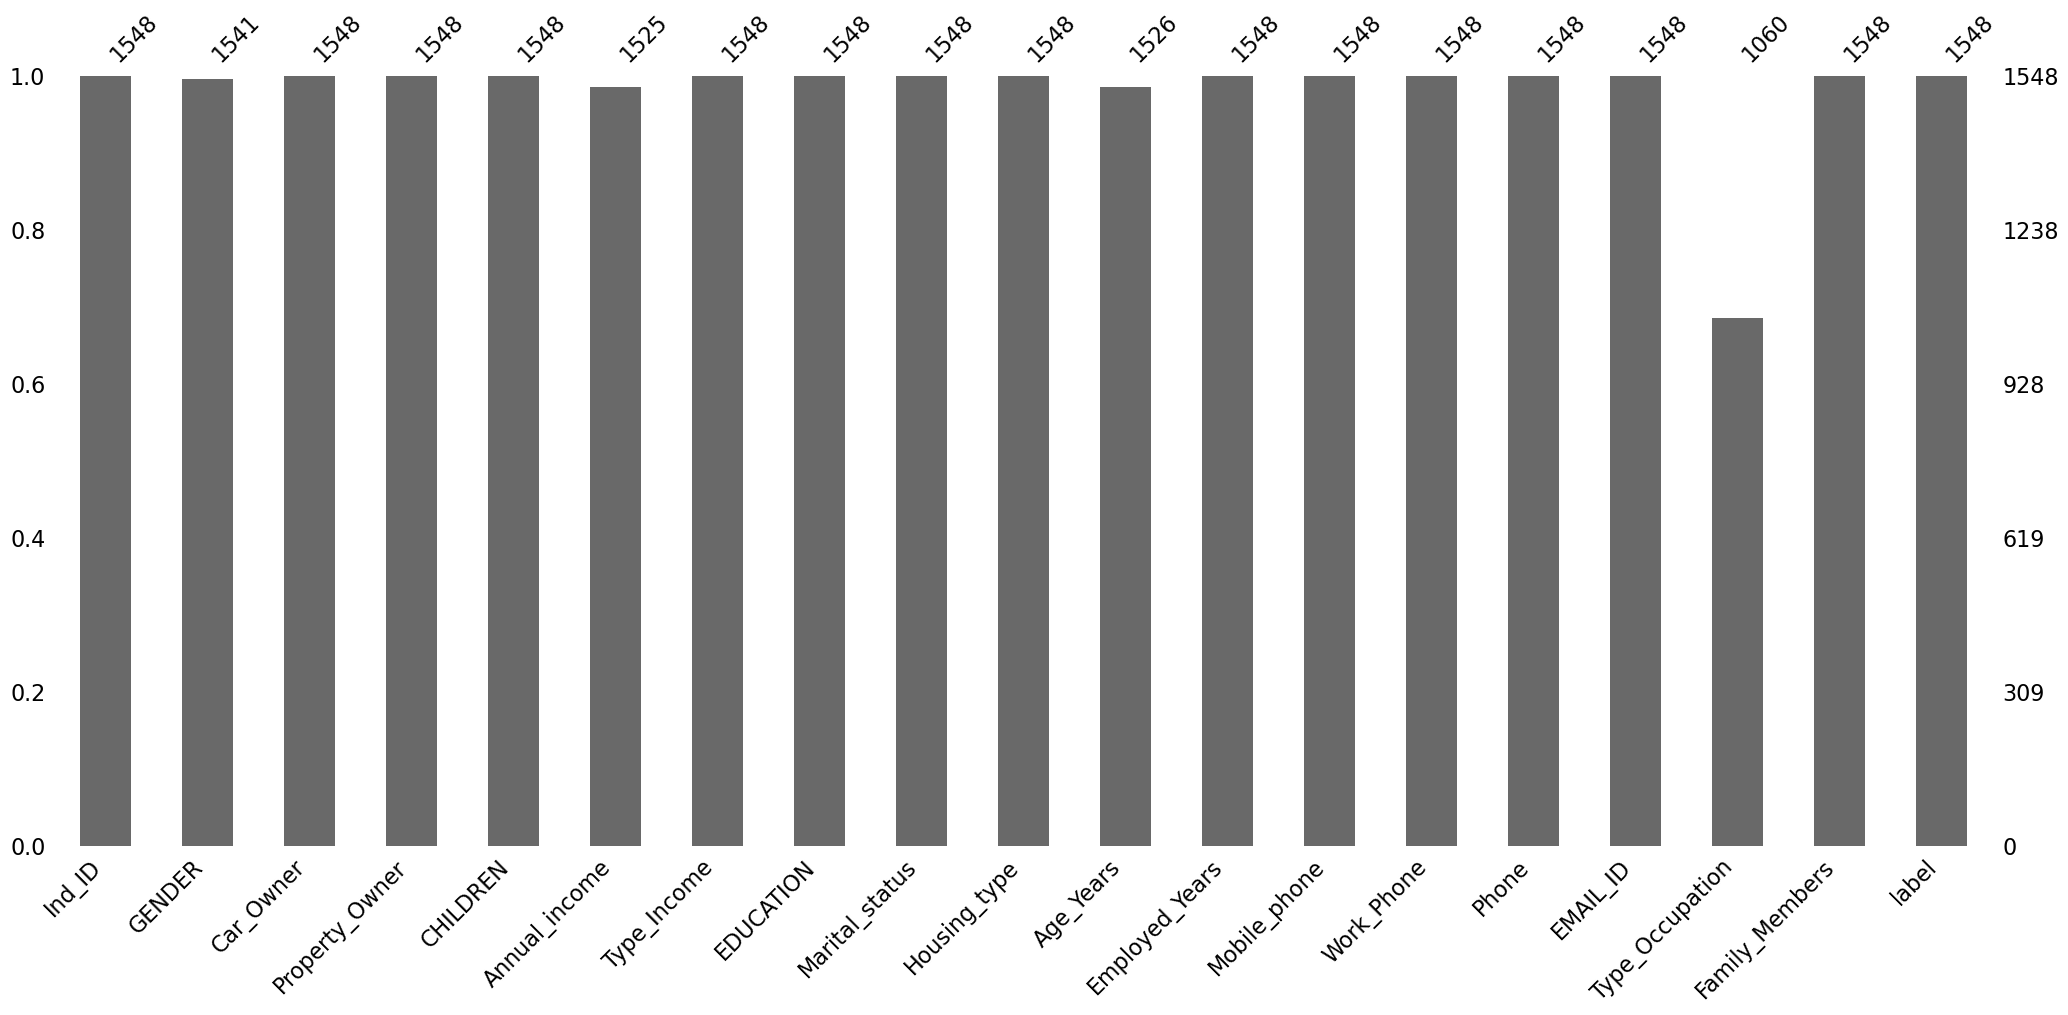

In [200]:
# Creating bar plot to see the missing values
msno.bar(cc_df)

<AxesSubplot:>

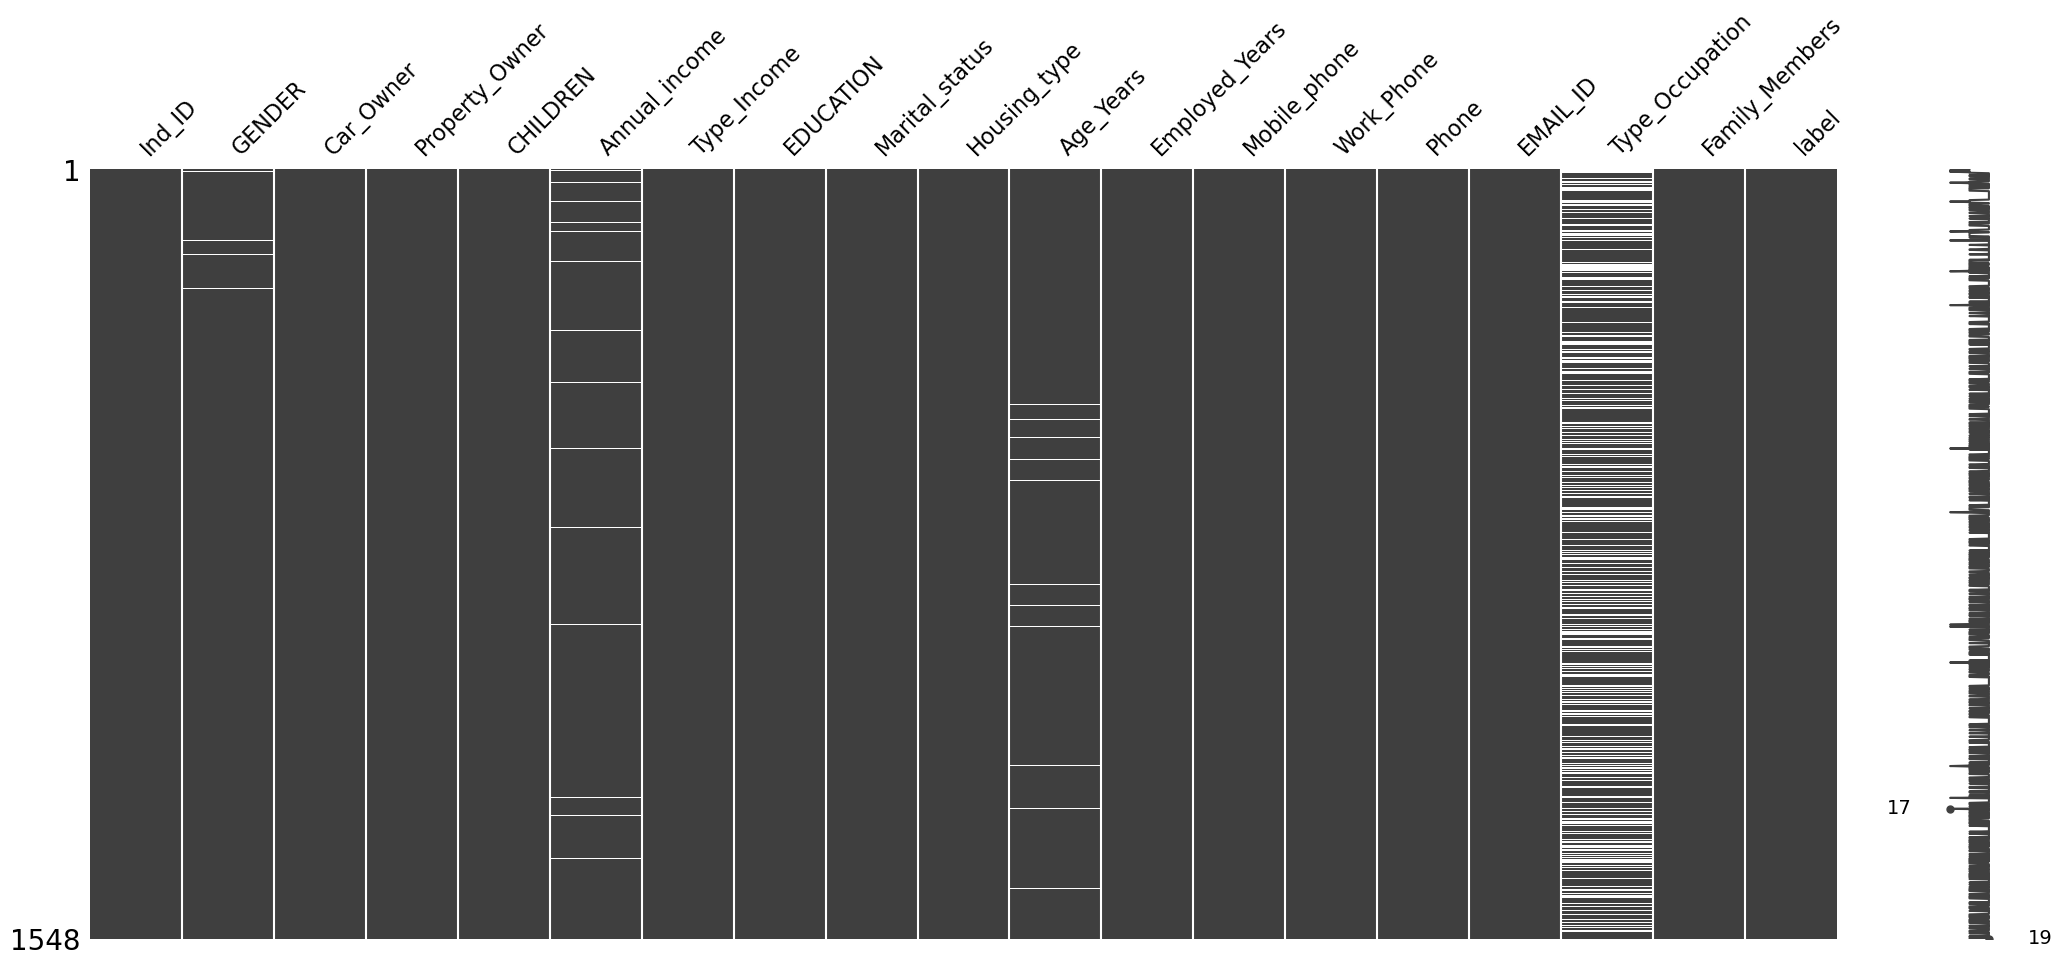

In [201]:
msno.matrix(cc_df)

* The Missing of one variable IS NOT DEPENDENT on the other VARIABLES. Hence it is MCAR (missing completly at random).

<AxesSubplot:>

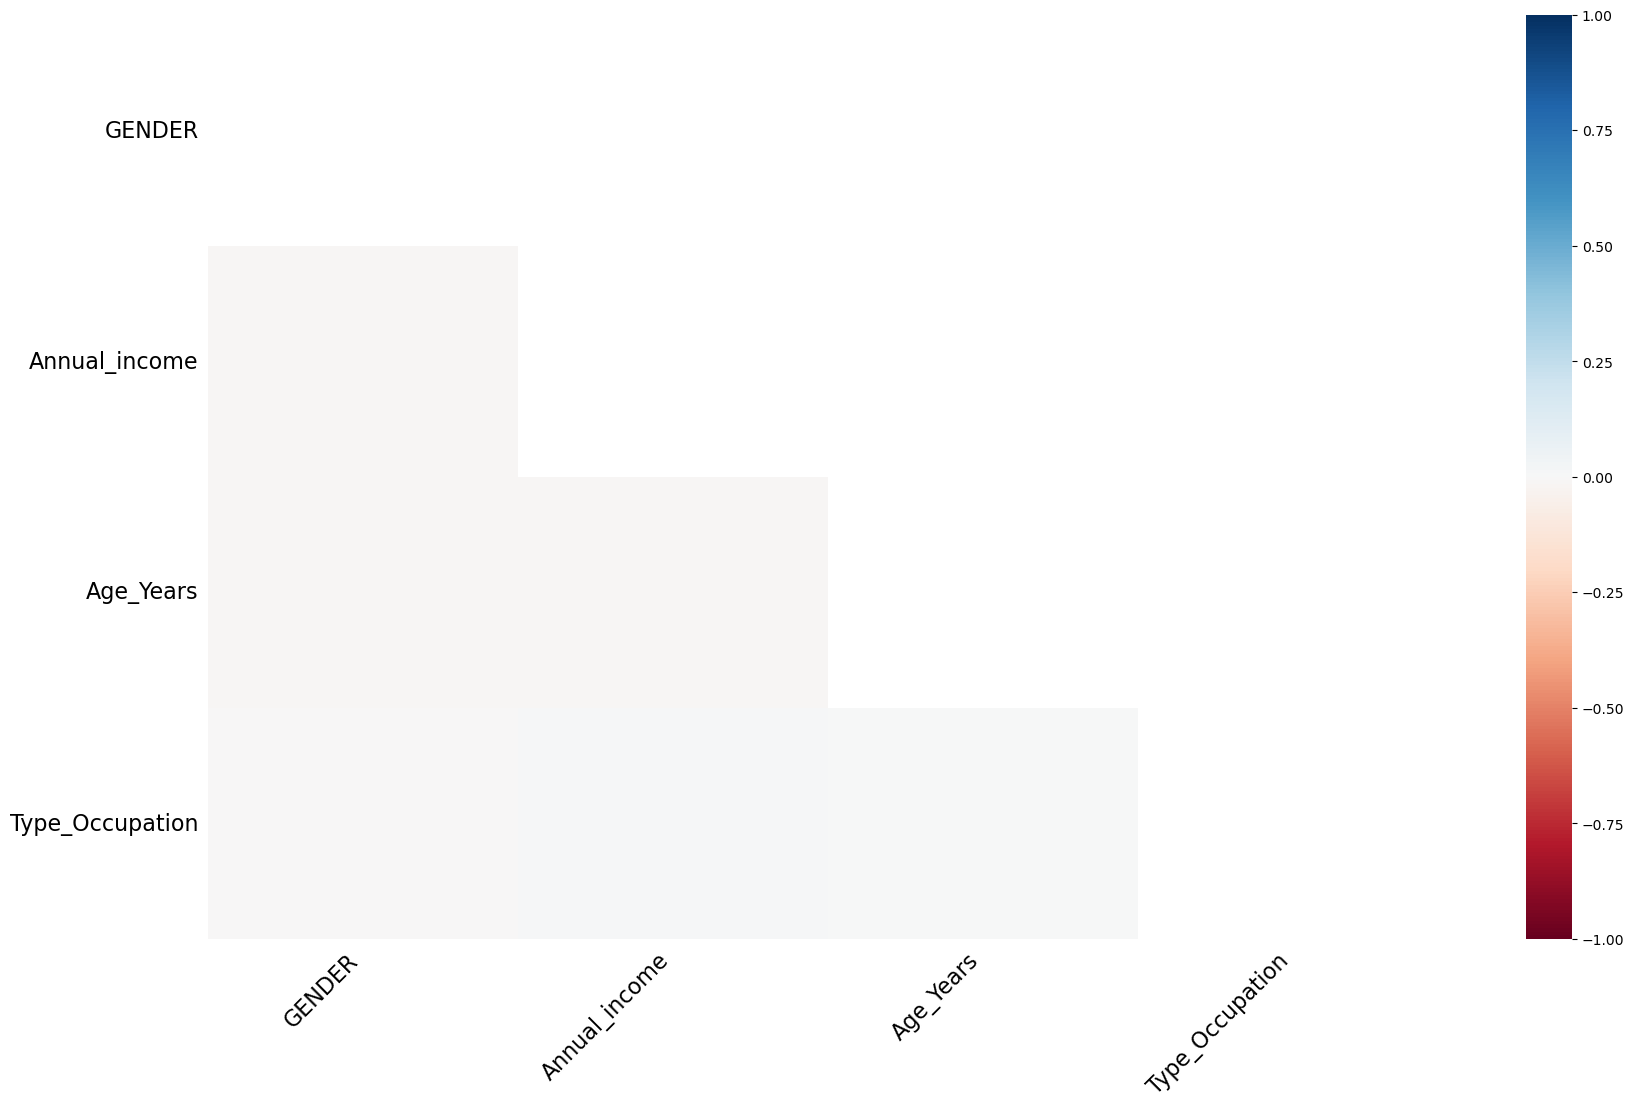

In [202]:
msno.heatmap(cc_df) 

* Ther is no correlation found

## Exploratory Data Analysis

## Column Types
* Numerical- Ind_ID, CHILDREN, Annual_income,Age_Years,	Employed_Years, Family_Members	      
* Categorical- GENDER, Car_Owner, Propert_Owner,Type_Income, EDUCATION,	Marital_status,	Housing_type,Mobile_phone,Work_Phone,	Phone, label
* Mixed- EMAIL_ID	

## Univariate Analysis

###  Annual_income

In [203]:
cc_df['Annual_income'].describe()

count      1525.00
mean     191399.33
std      113253.00
min       33750.00
25%      121500.00
50%      166500.00
75%      225000.00
max     1575000.00
Name: Annual_income, dtype: float64

In [204]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [205]:
cc_df['Annual_income'].describe()

count      1525.00
mean     191399.33
std      113253.00
min       33750.00
25%      121500.00
50%      166500.00
75%      225000.00
max     1575000.00
Name: Annual_income, dtype: float64

* There is a lot of difference between the 75th percectile and max value which tells us that there might be outliers

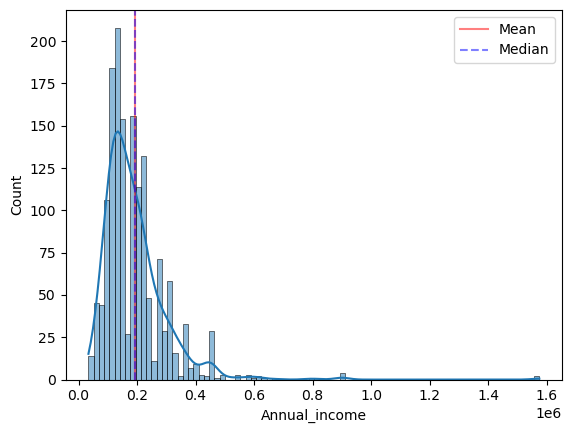

In [206]:
# Plotting histogram + density plot for annual income
sns.histplot(data = cc_df['Annual_income'], kde = True)  # histogram + density plot
plt.axvline(x=cc_df.Annual_income.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=cc_df.Annual_income.mean(),color='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

* This shows that the Annual income column is positively skewed with a tong tail to the right.

In [207]:
cc_df['Annual_income'].skew()

3.9245642452364167

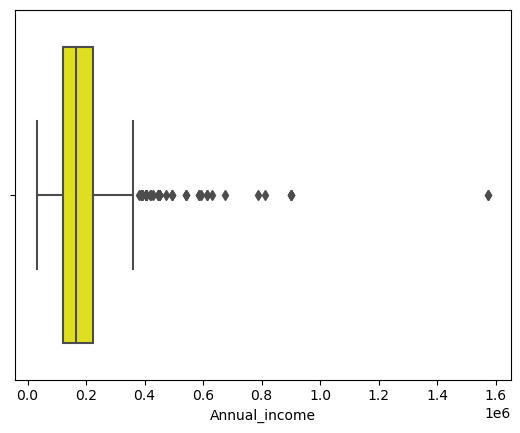

In [208]:
# Plotting a boxplot to check for outliers
plot = sns.boxplot(
    color='yellow',
    x=cc_df["Annual_income"] 
);
plt.show()

In [209]:
# checking percentage of missing values
cc_df['Annual_income'].isnull().sum()/len(cc_df['Annual_income'])*100

1.4857881136950903

### Employed_Years

In [210]:
cc_df['Employed_Years'].describe()

count   1548.00
mean       6.07
std        6.59
min        0.00
25%        1.00
50%        4.00
75%        9.00
max       41.00
Name: Employed_Years, dtype: float64

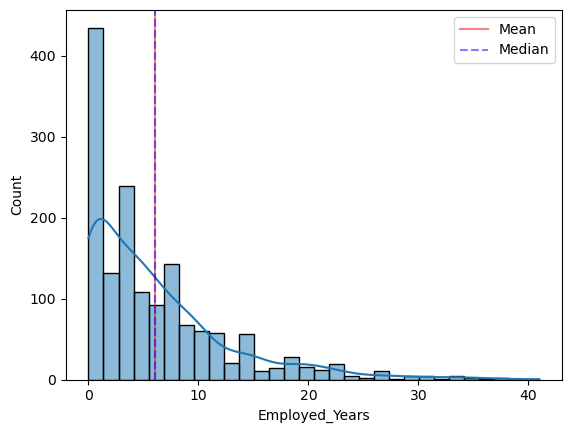

In [211]:
sns.histplot(data = cc_df['Employed_Years'], kde = True)  # histogram + density plot
plt.axvline(x=cc_df.Employed_Years.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=cc_df.Employed_Years.mean(),color='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

* Employed_Years column is slightly positively skewed

In [212]:
cc_df['Employed_Years'].skew()

1.7346229009825906

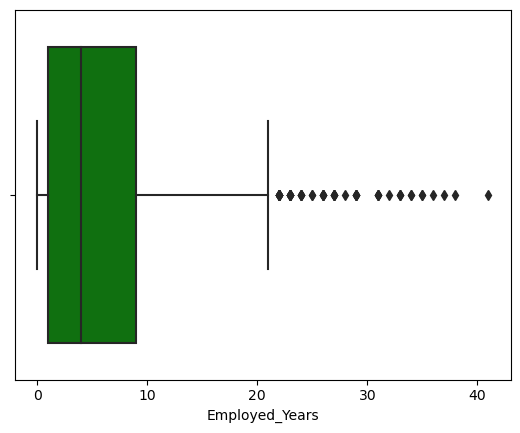

In [213]:
plot = sns.boxplot(
    color='green',
    x=cc_df["Employed_Years"] 
);
plt.show()

### Age_Years

In [214]:
cc_df['Age_Years'].describe()

count   1526.00
mean      43.95
std       11.60
min       21.00
25%       34.00
50%       43.00
75%       54.00
max       68.00
Name: Age_Years, dtype: float64

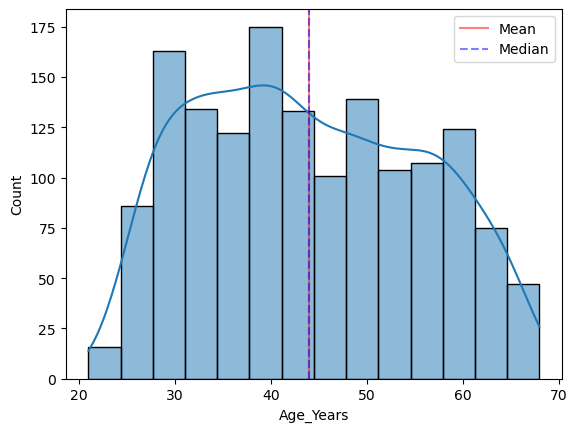

In [215]:
sns.histplot(data = cc_df['Age_Years'], kde = True)  # histogram + density plot
plt.axvline(x=cc_df.Age_Years.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=cc_df.Age_Years.mean(),color='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

In [216]:
cc_df['Age_Years'].skew()

0.1682020304018349

* This column has almost a normal distribution

### Family_Members

In [217]:
cc_df['Family_Members'].describe()

count   1548.00
mean       2.16
std        0.95
min        1.00
25%        2.00
50%        2.00
75%        3.00
max       15.00
Name: Family_Members, dtype: float64

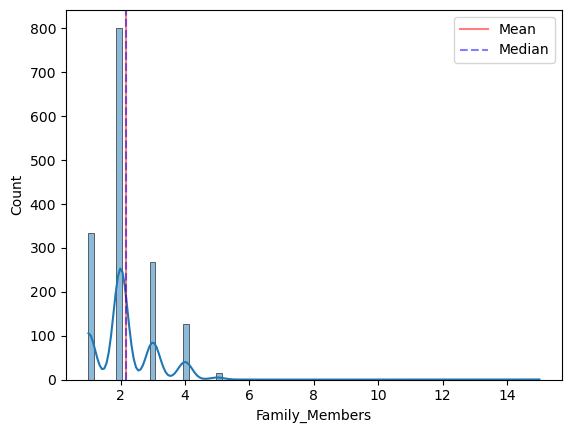

In [218]:
sns.histplot(data = cc_df['Family_Members'], kde = True)  # histogram + density plot
plt.axvline(x=cc_df.Family_Members.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=cc_df.Family_Members.mean(),color='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

In [219]:
cc_df['Family_Members'].skew()

2.2322733446463294

* This column is positively skewed 

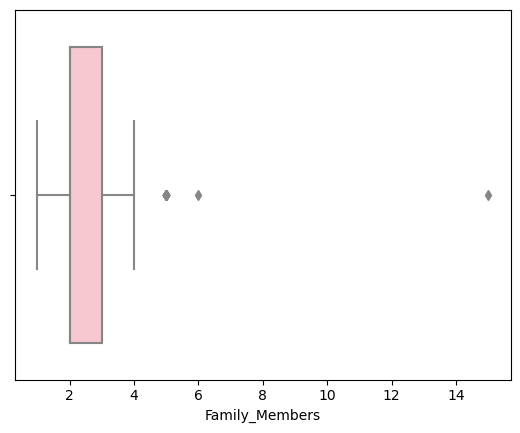

In [220]:
plot = sns.boxplot(
    color='pink',
    x=cc_df["Family_Members"] 
);
plt.show()


* There is a family which has more than 14 members

## Categorical Columns

### Gender

In [221]:
cc_df['GENDER'].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

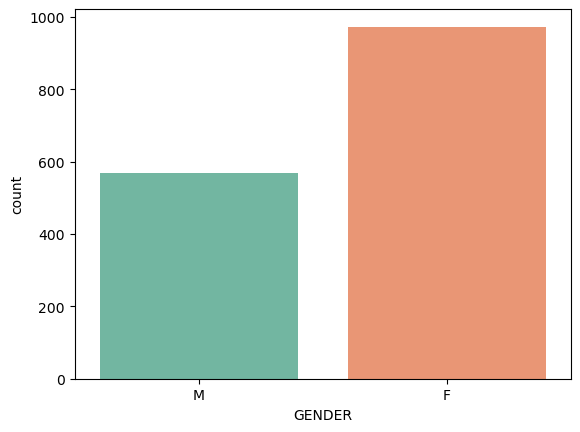

In [222]:
plot = sns.countplot(
   x=cc_df["GENDER"], palette = "Set2" 
);
plt.show()

* Female customers are much more than male customers

In [223]:
cc_df['GENDER'].isnull().sum()

7

* Gender column has 7 missing values

### Car_Owner

In [224]:
cc_df['Car_Owner'].value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

* There are 624 customers who have a car and 924 customers have don't have cars

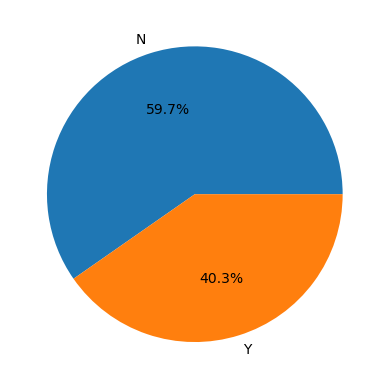

In [225]:
# Checking the percentage
x = cc_df['Car_Owner'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

In [226]:
cc_df['Car_Owner'].isnull().sum()

0

### Property_Owner

In [227]:
cc_df['Property_Owner'].value_counts()

Y    1010
N     538
Name: Property_Owner, dtype: int64

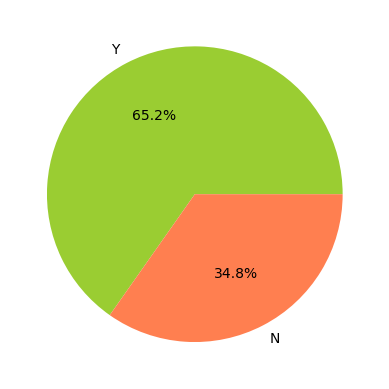

In [228]:
x = cc_df['Property_Owner'].value_counts()
custom_colors = ['yellowgreen', 'coral']
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%',
        colors=custom_colors)
plt.show()

In [229]:
cc_df['Property_Owner'].isnull().sum()

0

### Type_Income

In [230]:
cc_df['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

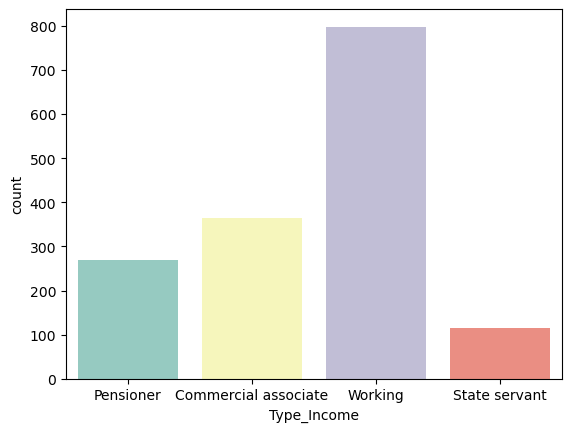

In [231]:
plot = sns.countplot(
   x=cc_df["Type_Income"], palette = "Set3" 
);
plt.show()

In [232]:
cc_df['Type_Income'].isnull().sum()

0

### EDUCATION

In [233]:
cc_df['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

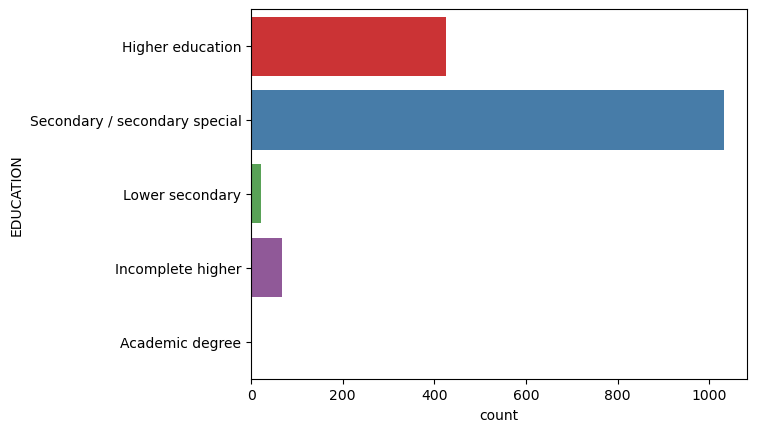

In [234]:
plot = sns.countplot(
   y=cc_df["EDUCATION"], palette = "Set1" 
);
plt.show()

### Marital_status

In [235]:
cc_df['Marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

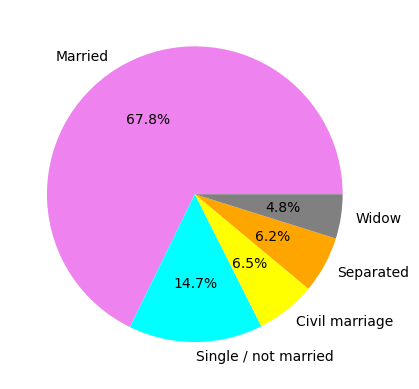

In [236]:
x = cc_df['Marital_status'].value_counts()
custom_colors = ['violet', 'cyan', 'yellow','orange','grey']
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%',
        colors=custom_colors)
plt.show()

In [237]:
cc_df['Marital_status'].isnull().sum()

0

### Housing_type

In [238]:
cc_df['Housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

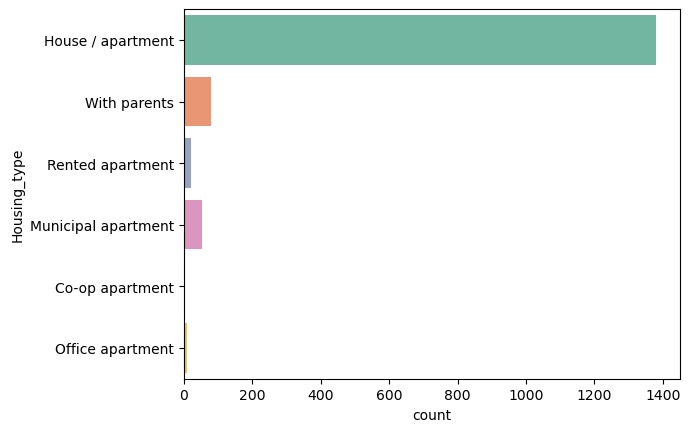

In [239]:
plot = sns.countplot(
   y=cc_df["Housing_type"], palette = "Set2" 
);
plt.show()

In [240]:
cc_df['Housing_type'].isnull().sum()

0

### Label


In [241]:
cc_df['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

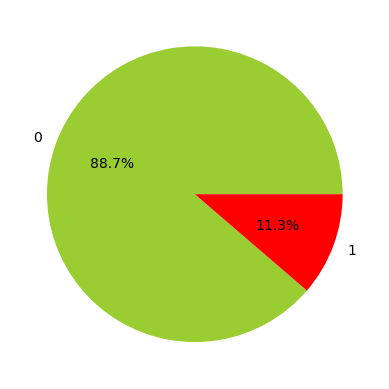

In [242]:
x = cc_df['label'].value_counts()
custom_colors = ['yellowgreen','red']
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%',
        colors=custom_colors)
plt.show()

* 88.7% customers have been approved a credit card
* 11.3% customers have been denied a credit card

## Bivariate Analysis

In [243]:
cc_df['label'] = cc_df['label'].replace({0: 'Yes', 1: 'No'})

In [244]:
pd.crosstab(cc_df['label'], cc_df['GENDER'], normalize='columns')*100

GENDER,F,M
label,,
No,9.76,13.20
Yes,90.24,86.80


* More number of females have been approved a credit card than male customers

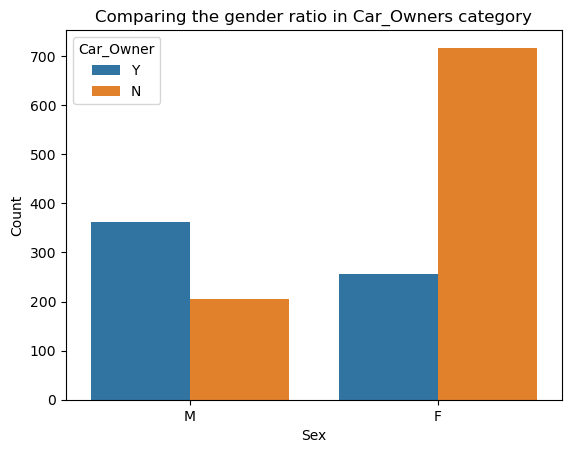

In [245]:
sns.countplot(data=cc_df, x="GENDER", hue="Car_Owner")
plt.title("Comparing the gender ratio in Car_Owners category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

* Male car owners are more than female car owners

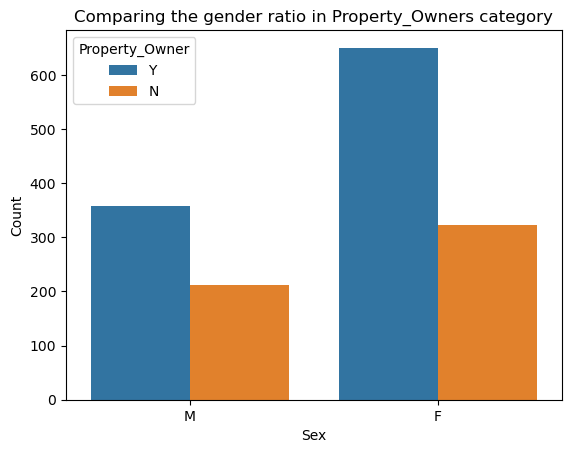

In [246]:
sns.countplot(data=cc_df, x="GENDER", hue="Property_Owner")
plt.title("Comparing the gender ratio in Property_Owners category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

* More females are property owners than males

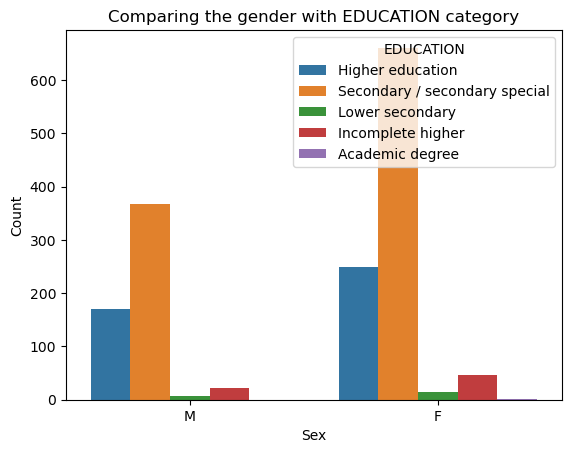

In [247]:
sns.countplot(data=cc_df, x="GENDER", hue="EDUCATION")
plt.title("Comparing the gender with EDUCATION category")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

* More number of females are educated than males

In [248]:
fig = px.histogram(cc_df,
                  x = "label",
                  marginal = 'box', 
                   color="GENDER",
                  title = "Credit card approved over Gender ")
fig.update_layout(bargap=0.2)
fig.show()

* More number of females have been approved a credit card than males

In [249]:
pd.crosstab(cc_df['Marital_status'], cc_df['label'], normalize='columns')*100 

label,No,Yes
Marital_status,,
Civil marriage,2.29,7.06
Married,65.14,68.10
Separated,8.00,5.97
Single / not married,20.00,13.98
Widow,4.57,4.88


* More number of married customers are approved a credit card

In [250]:
cc_df.to_csv('Clean_Creditcard.csv')

In [251]:
# Converting the categorical variables to numerical so that we can feed the data into machine learning models
cc_df['GENDER'] = cc_df.GENDER.map({'M': 0, 'F':1})
cc_df['Car_Owner'] = cc_df.Car_Owner.map({'N': 0, 'Y':1})
cc_df['Property_Owner'] = cc_df.Property_Owner.map({'N': 0, 'Y':1})

## Encoding

In [252]:
cc_df.shape

(1548, 19)

In [253]:
import category_encoders as ce

# Define the columns to be binary encoded
columns_to_encode = ['Type_Income', 'Marital_status','Housing_type']

# Initialize the BinaryEncoder
encoder = ce.BinaryEncoder(cols=columns_to_encode)

# Apply the binary encoding to the DataFrame
cc_df_encoded = encoder.fit_transform(cc_df)

# Display the first few rows of the encoded DataFrame
print(cc_df_encoded.head())

    Ind_ID  GENDER  Car_Owner  Property_Owner  CHILDREN  Annual_income  \
0  5008827    0.00          1               1         0      180000.00   
1  5009744    1.00          1               0         0      315000.00   
2  5009746    1.00          1               0         0      315000.00   
3  5009749    1.00          1               0         0            NaN   
4  5009752    1.00          1               0         0      315000.00   

   Type_Income_0  Type_Income_1  Type_Income_2         EDUCATION  ...  \
0              0              0              1  Higher education  ...   
1              0              1              0  Higher education  ...   
2              0              1              0  Higher education  ...   
3              0              1              0  Higher education  ...   
4              0              1              0  Higher education  ...   

   Housing_type_2  Age_Years  Employed_Years  Mobile_phone  Work_Phone  Phone  \
0               1      51.00       

In [254]:
cc_df_encoded.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION,...,Housing_type_2,Age_Years,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,0.00,1,1,0,180000.00,0,0,1,Higher education,...,1,51.00,0.00,1,0,0,0,NaN,2,No
1,5009744,1.00,1,0,0,315000.00,0,1,0,Higher education,...,1,37.00,2.00,1,1,1,0,NaN,2,No
2,5009746,1.00,1,0,0,315000.00,0,1,0,Higher education,...,1,NaN,2.00,1,1,1,0,NaN,2,No
3,5009749,1.00,1,0,0,NaN,0,1,0,Higher education,...,1,37.00,2.00,1,1,1,0,NaN,2,No
4,5009752,1.00,1,0,0,315000.00,0,1,0,Higher education,...,1,37.00,2.00,1,1,1,0,NaN,2,No


In [256]:
cc_df_encoded.shape

(1548, 25)

In [257]:
cc_df_encoded['EDUCATION'] = cc_df_encoded.EDUCATION.map({'Higher education': 0,'Secondary / secondary special':1,
                                              'Lower secondary':2,'Incomplete higher':3,'Academic degree':4})

In [258]:
cc_df_encoded.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION,...,Housing_type_2,Age_Years,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,0.00,1,1,0,180000.00,0,0,1,0,...,1,51.00,0.00,1,0,0,0,NaN,2,No
1,5009744,1.00,1,0,0,315000.00,0,1,0,0,...,1,37.00,2.00,1,1,1,0,NaN,2,No
2,5009746,1.00,1,0,0,315000.00,0,1,0,0,...,1,NaN,2.00,1,1,1,0,NaN,2,No
3,5009749,1.00,1,0,0,NaN,0,1,0,0,...,1,37.00,2.00,1,1,1,0,NaN,2,No
4,5009752,1.00,1,0,0,315000.00,0,1,0,0,...,1,37.00,2.00,1,1,1,0,NaN,2,No


In [261]:
cc_df_encoded.drop(['Phone','Work_Phone','Type_Occupation'],axis=1,inplace=True)

In [267]:
cc_df_encoded['label'] = cc_df_encoded['label'].replace({'Yes': 0, 'No': 1})

In [268]:
cc_df_encoded.head(10)

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION,...,Marital_status_2,Housing_type_0,Housing_type_1,Housing_type_2,Age_Years,Employed_Years,Mobile_phone,EMAIL_ID,Family_Members,label
0,5008827,0.00,1,1,0,180000.00,0,0,1,0,...,1,0,0,1,51.00,0.00,1,0,2,1
1,5009744,1.00,1,0,0,315000.00,0,1,0,0,...,1,0,0,1,37.00,2.00,1,0,2,1
2,5009746,1.00,1,0,0,315000.00,0,1,0,0,...,1,0,0,1,NaN,2.00,1,0,2,1
3,5009749,1.00,1,0,0,NaN,0,1,0,0,...,1,0,0,1,37.00,2.00,1,0,2,1
4,5009752,1.00,1,0,0,315000.00,0,1,0,0,...,1,0,0,1,37.00,2.00,1,0,2,1
5,5009753,NaN,1,0,0,315000.00,0,0,1,0,...,1,0,0,1,37.00,2.00,1,0,2,1
6,5009754,1.00,1,0,0,315000.00,0,1,0,0,...,1,0,0,1,37.00,2.00,1,0,2,1
7,5009894,1.00,0,0,0,180000.00,0,0,1,1,...,1,0,0,1,61.00,0.00,1,0,2,1
8,5010864,0.00,1,1,1,450000.00,0,1,0,1,...,1,0,0,1,50.00,2.00,1,1,3,1
9,5010868,0.00,1,1,1,450000.00,0,0,1,1,...,1,0,0,1,50.00,2.00,1,1,3,1


In [347]:
cc_df_encoded['label'].dtypes

dtype('int64')

In [269]:
import fancyimpute
from fancyimpute import KNN
knn_imputer = KNN()
data_knn = cc_df_encoded.copy(deep=True)
data_knn.iloc[:, :] = knn_imputer.fit_transform(data_knn)

Imputing row 1/1548 with 0 missing, elapsed time: 0.411
Imputing row 101/1548 with 0 missing, elapsed time: 0.411
Imputing row 201/1548 with 0 missing, elapsed time: 0.411
Imputing row 301/1548 with 0 missing, elapsed time: 0.411
Imputing row 401/1548 with 0 missing, elapsed time: 0.411
Imputing row 501/1548 with 0 missing, elapsed time: 0.411
Imputing row 601/1548 with 0 missing, elapsed time: 0.411
Imputing row 701/1548 with 0 missing, elapsed time: 0.411
Imputing row 801/1548 with 0 missing, elapsed time: 0.411
Imputing row 901/1548 with 0 missing, elapsed time: 0.411
Imputing row 1001/1548 with 0 missing, elapsed time: 0.411
Imputing row 1101/1548 with 0 missing, elapsed time: 0.411
Imputing row 1201/1548 with 0 missing, elapsed time: 0.411
Imputing row 1301/1548 with 0 missing, elapsed time: 0.411
Imputing row 1401/1548 with 0 missing, elapsed time: 0.411
Imputing row 1501/1548 with 0 missing, elapsed time: 0.411


In [270]:
cc_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ind_ID            1548 non-null   int64  
 1   GENDER            1541 non-null   float64
 2   Car_Owner         1548 non-null   int64  
 3   Property_Owner    1548 non-null   int64  
 4   CHILDREN          1548 non-null   int64  
 5   Annual_income     1525 non-null   float64
 6   Type_Income_0     1548 non-null   int64  
 7   Type_Income_1     1548 non-null   int64  
 8   Type_Income_2     1548 non-null   int64  
 9   EDUCATION         1548 non-null   int64  
 10  Marital_status_0  1548 non-null   int64  
 11  Marital_status_1  1548 non-null   int64  
 12  Marital_status_2  1548 non-null   int64  
 13  Housing_type_0    1548 non-null   int64  
 14  Housing_type_1    1548 non-null   int64  
 15  Housing_type_2    1548 non-null   int64  
 16  Age_Years         1526 non-null   float64


In [271]:
data_knn.isnull().sum()

Ind_ID              0
GENDER              0
Car_Owner           0
Property_Owner      0
CHILDREN            0
Annual_income       0
Type_Income_0       0
Type_Income_1       0
Type_Income_2       0
EDUCATION           0
Marital_status_0    0
Marital_status_1    0
Marital_status_2    0
Housing_type_0      0
Housing_type_1      0
Housing_type_2      0
Age_Years           0
Employed_Years      0
Mobile_phone        0
EMAIL_ID            0
Family_Members      0
label               0
dtype: int64

* After KNN imputation we dont have any missing values

## Outlier Removal

In [272]:
data_knn.skew()

Ind_ID              0.07
GENDER             -0.54
Car_Owner           0.40
Property_Owner     -0.64
CHILDREN            4.63
Annual_income       3.91
Type_Income_0       3.23
Type_Income_1      -1.16
Type_Income_2      -0.82
EDUCATION           1.20
Marital_status_0    2.49
Marital_status_1    1.41
Marital_status_2   -1.44
Housing_type_0      4.49
Housing_type_1      3.34
Housing_type_2     -2.83
Age_Years           0.17
Employed_Years      1.73
Mobile_phone        0.00
EMAIL_ID            2.82
Family_Members      2.23
label               2.45
dtype: float64

In [274]:
percentile25 = data_knn['Annual_income'].quantile(0.25)
percentile75 = data_knn['Annual_income'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [275]:
# Applying capping to remove outliers
new_df_cap = data_knn.copy()

new_df_cap['Annual_income'] = np.where(
    new_df_cap['Annual_income'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Annual_income'] < lower_limit,
        lower_limit,
        new_df_cap['Annual_income']
    )
)

In [276]:
new_df_cap['Annual_income'].skew()

0.7811846778260793

In [277]:
new_df_cap[new_df_cap['CHILDREN']> 12]   

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION,...,Marital_status_2,Housing_type_0,Housing_type_1,Housing_type_2,Age_Years,Employed_Years,Mobile_phone,EMAIL_ID,Family_Members,label
565,5061207.00,0.00,1.00,1.00,14.00,225000.00,0.00,1.00,1.00,1.00,...,0.00,0.00,0.00,1.00,49.00,5.00,1.00,0.00,15.00,0.00


In [278]:
new_df_cap = new_df_cap.drop(565)

In [279]:
new_df_cap[new_df_cap['CHILDREN']> 3]   

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION,...,Marital_status_2,Housing_type_0,Housing_type_1,Housing_type_2,Age_Years,Employed_Years,Mobile_phone,EMAIL_ID,Family_Members,label
121,5116258.00,1.00,0.00,1.00,4.00,180000.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,1.00,48.00,20.00,1.00,0.00,6.00,1.00


In [280]:
new_df_cap = new_df_cap.drop(121)

In [281]:
new_df_cap['CHILDREN'].skew()

1.6225549277792606

In [283]:
from scipy import stats

# Define a threshold for Z-scores (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Calculate the Z-scores for the columns containing numerical data
z_scores = stats.zscore(new_df_cap[['Type_Income_0','Housing_type_0','Marital_status_0','EMAIL_ID','label','Housing_type_1','Housing_type_2' ]])

# Find the indices of rows where any Z-score exceeds the threshold
outlier_indices = (z_scores > threshold).any(axis=1)

# Filter the dataframe to remove rows with outliers
df_cleaned = new_df_cap[~outlier_indices]

# Print the shape of the cleaned dataframe to see how many rows were removed
print("Original shape:", new_df_cap.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (1546, 22)
Cleaned shape: (1168, 22)


## Train Test Split

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [285]:
X = df_cleaned.drop(labels=['label'],axis=1)
y = df_cleaned[['label']]

In [286]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [287]:
X_train.shape

(934, 21)

In [288]:
X_test.shape

(234, 21)

In [289]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [290]:
X_train

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION,...,Marital_status_1,Marital_status_2,Housing_type_0,Housing_type_1,Housing_type_2,Age_Years,Employed_Years,Mobile_phone,EMAIL_ID,Family_Members
791,5009908.00,0.00,1.00,0.00,0.00,202500.00,0.00,1.00,1.00,1.00,...,0.00,1.00,0.00,0.00,1.00,52.00,10.00,1.00,0.00,2.00
249,5096416.00,1.00,0.00,0.00,0.00,76500.00,0.00,1.00,1.00,1.00,...,0.00,1.00,0.00,0.00,1.00,46.00,0.00,1.00,0.00,2.00
992,5136020.00,0.00,1.00,0.00,1.00,351000.00,0.00,1.00,0.00,1.00,...,0.00,1.00,0.00,0.00,1.00,44.00,23.00,1.00,0.00,3.00
242,5090470.00,0.00,0.00,1.00,1.00,380250.00,0.00,1.00,1.00,1.00,...,0.00,1.00,0.00,0.00,1.00,42.00,12.00,1.00,0.00,3.00
797,5074705.00,1.00,0.00,1.00,0.00,157500.00,0.00,1.00,1.00,0.00,...,1.00,0.00,0.00,0.00,1.00,61.00,29.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,5035431.00,0.00,1.00,1.00,0.00,283345.80,0.00,1.00,1.00,1.00,...,1.00,0.00,0.00,0.00,1.00,39.00,3.00,1.00,0.00,1.00
1458,5058408.00,0.00,1.00,1.00,0.00,247500.00,0.00,1.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,35.00,7.00,1.00,0.00,2.00
1503,5116594.00,0.00,1.00,0.00,0.00,157500.00,0.00,1.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,43.00,2.00,1.00,0.00,2.00
1145,5085780.00,0.00,0.00,1.00,0.00,315000.00,0.00,1.00,0.00,1.00,...,1.00,1.00,0.00,0.00,1.00,49.00,11.00,1.00,0.00,2.00


In [291]:
X_train_scaled

array([[-1.65519991, -1.30677343,  1.2346353 , ...,  0.        ,
         0.        , -0.13536168],
       [ 0.44906961,  0.7667963 , -0.80995578, ...,  0.        ,
         0.        , -0.13536168],
       [ 1.41241971, -1.30677343,  1.2346353 , ...,  0.        ,
         0.        ,  1.01398202],
       ...,
       [ 0.93989069, -1.30677343,  1.2346353 , ...,  0.        ,
         0.        , -0.13536168],
       [ 0.19035353, -1.30677343, -0.80995578, ...,  0.        ,
         0.        , -0.13536168],
       [-1.6278591 ,  0.7667963 , -0.80995578, ...,  0.        ,
         0.        ,  1.01398202]])

In [292]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [293]:
np.round(X_train.describe(), 1)

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION,...,Marital_status_1,Marital_status_2,Housing_type_0,Housing_type_1,Housing_type_2,Age_Years,Employed_Years,Mobile_phone,EMAIL_ID,Family_Members
count,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,...,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00
mean,5077954.40,0.60,0.40,0.70,0.40,179786.00,0.00,0.80,0.80,0.80,...,0.20,0.80,0.00,0.00,1.00,45.60,5.90,1.00,0.00,2.10
std,41132.70,0.50,0.50,0.50,0.70,79199.20,0.00,0.40,0.40,0.70,...,0.40,0.40,0.00,0.00,0.00,11.50,6.50,0.00,0.00,0.90
min,5008827.00,0.00,0.00,0.00,0.00,33750.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,23.00,0.00,1.00,0.00,1.00
25%,5044860.20,0.00,0.00,0.00,0.00,118915.70,0.00,1.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,36.20,1.00,1.00,0.00,2.00
50%,5069389.50,1.00,0.00,1.00,0.00,157500.00,0.00,1.00,1.00,1.00,...,0.00,1.00,0.00,0.00,1.00,45.00,4.00,1.00,0.00,2.00
75%,5115607.00,1.00,1.00,1.00,1.00,225000.00,0.00,1.00,1.00,1.00,...,0.00,1.00,0.00,0.00,1.00,55.00,9.00,1.00,0.00,2.00
max,5150412.00,1.00,1.00,1.00,3.00,380250.00,0.00,1.00,1.00,4.00,...,1.00,1.00,0.00,0.00,1.00,68.00,41.00,1.00,0.00,5.00


In [294]:
np.round(X_train_scaled.describe(), 1)

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income_0,Type_Income_1,Type_Income_2,EDUCATION,...,Marital_status_1,Marital_status_2,Housing_type_0,Housing_type_1,Housing_type_2,Age_Years,Employed_Years,Mobile_phone,EMAIL_ID,Family_Members
count,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,...,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00,934.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,...,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
min,-1.70,-1.30,-0.80,-1.50,-0.50,-1.80,0.00,-1.90,-1.80,-1.30,...,-0.50,-1.90,0.00,0.00,0.00,-2.00,-0.90,0.00,0.00,-1.30
25%,-0.80,-1.30,-0.80,-1.50,-0.50,-0.80,0.00,0.50,0.60,-1.30,...,-0.50,0.50,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,-0.10
50%,-0.20,0.80,-0.80,0.70,-0.50,-0.30,0.00,0.50,0.60,0.20,...,-0.50,0.50,0.00,0.00,0.00,-0.10,-0.30,0.00,0.00,-0.10
75%,0.90,0.80,1.20,0.70,0.90,0.60,0.00,0.50,0.60,0.20,...,-0.50,0.50,0.00,0.00,0.00,0.80,0.50,0.00,0.00,-0.10
max,1.80,0.80,1.20,0.70,3.90,2.50,0.00,0.50,0.60,4.90,...,2.00,0.50,0.00,0.00,0.00,2.00,5.40,0.00,0.00,3.30


In [295]:
#importing libraries for random forest,knn classifier,support vector classifier and decision tree.
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score,confusion_matrix

In [296]:
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

### Logistic Regression

In [298]:
# Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [341]:
# Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=0)

In [300]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [301]:
confusion_matrix=confusion_matrix(y_test, logistic_reg_pred)
confusion_matrix

array([[212,   0],
       [ 22,   0]], dtype=int64)

In [302]:
# accuracy using accuracy_score
print("Logistic Regression Accuracy_score:",round(accuracy_score(y_test, logistic_reg_pred), 2))

Logistic Regression Accuracy_score: 0.91


In [303]:
print("Accuracy:",round(precision_score(y_test, logistic_reg_pred), 2))

Accuracy: 0.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [304]:
from sklearn.metrics import f1_score
print("F1 score:",round(f1_score(y_test, logistic_reg_pred), 2))

F1 score: 0.0


In [305]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.5

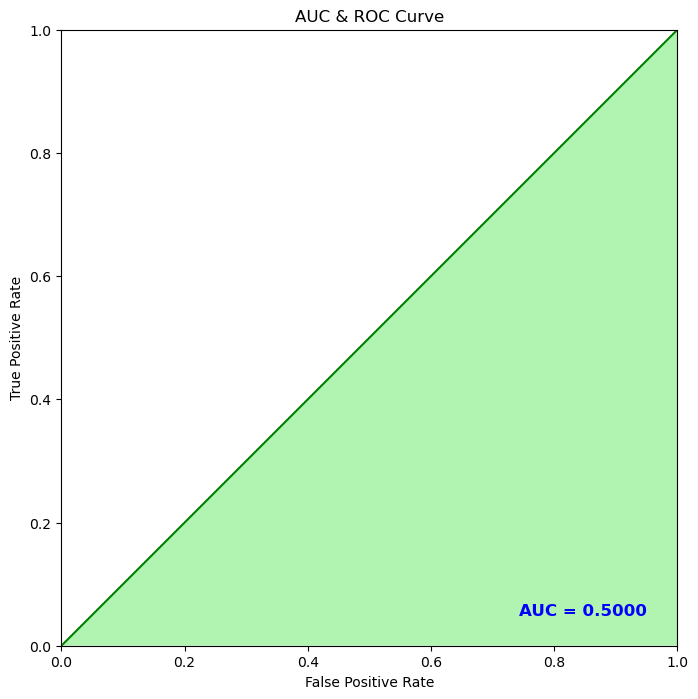

In [306]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [307]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, logistic_reg.predict_proba(X_test))
logloss

0.31327889180567003

## Decision Tree Classifier

In [308]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [315]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=classification.predict(X_test)

In [316]:
# accuracy using accuracy_score
print("Accuracy score of Decision tree ",round(accuracy_score(y_test, y_pred),2))
# precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred), 2))
print("Recall score",round(recall_score(y_test, y_pred), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred), 2))     

Accuracy score of Decision tree  0.89
Precision Score 0.43
Recall score 0.59
f1 score 0.5


## Random Forest Classifier

In [367]:
from sklearn.ensemble import RandomForestClassifier
# Create Decision Tree classifer object
classification =  RandomForestClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = classification.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [370]:
conf_matrix= confusion_matrix(y_test, y_pred1)
print("confusion matrix:",conf_matrix)
### accuracy using accuracy_score
print("Accuracy score of random forest ",round(accuracy_score(y_test, y_pred1), 2))
### precision using Precision_score
print("Precision Score",round(precision_score(y_test, y_pred1), 2))
print("Recall score",round(recall_score(y_test, y_pred1), 2))     #Recall using Recall_score
print("f1 score",round(f1_score(y_test,y_pred1), 2)) 

confusion matrix: [[212   0]
 [ 12  10]]
Accuracy score of random forest  0.95
Precision Score 1.0
Recall score 0.45
f1 score 0.62


Accuracy score for 3 ML models in used for this data :

Logistic Regression Accuracy-score:0.91

Decision tree Accuracy-score:0.89

Random forest Accuracy-score:0.95

#### Finally based on my observations the best among all ML models is Random Forest Classifier.
Reasons:-
Random Forest Classifier:-
* Accuracy: 95%
* Precision: 1.0 (High precision indicates very low false positives)
* Recall: 45% (Indicates the model is able to capture only 45.45% of true positives)
* F1 Score: 62% (A balance between precision and recall)

Logistic Regression:-
* Accuracy: 91%
* Precision: 0.0 (This is concerning, indicating the model never predicts positive class)
* F1 Score: 0.0 (Again, a concern for positive class prediction)

Decision Tree:-
* Accuracy: 88.89%
* Precision: 0.43 (Indicates some false positives)
* Recall: 59% (Indicates the model is able to capture 59.09% of true positives)
* F1 Score: 50% (A balance between precision and recall)

## Recommendation

* More female customers should be approched for a credit card.
* Married people should be approched more as it reduces risk.
* Also educated people should be approched more for a credit card